In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:
# decide the x and y
x = df.drop(['Purchased', 'User ID', 'Gender'], axis=1)
y = df['Purchased']

In [4]:
# split the data into train and test datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

#### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

# create the model 
model = DecisionTreeClassifier(criterion="entropy")

# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### tree visualization

[Text(141.69864130434783, 208.38, 'X[0] <= 44.5\nentropy = 0.952\nsamples = 320\nvalue = [201, 119]'),
 Text(72.78260869565217, 190.26, 'X[1] <= 89500.0\nentropy = 0.648\nsamples = 223\nvalue = [186, 37]'),
 Text(36.391304347826086, 172.14, 'X[0] <= 36.5\nentropy = 0.208\nsamples = 183\nvalue = [177, 6]'),
 Text(29.11304347826087, 154.01999999999998, 'entropy = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(43.66956521739131, 154.01999999999998, 'X[1] <= 67500.0\nentropy = 0.474\nsamples = 59\nvalue = [53, 6]'),
 Text(36.391304347826086, 135.89999999999998, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(50.947826086956525, 135.89999999999998, 'X[1] <= 70500.0\nentropy = 0.764\nsamples = 27\nvalue = [21, 6]'),
 Text(43.66956521739131, 117.77999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(58.22608695652174, 117.77999999999999, 'X[1] <= 83500.0\nentropy = 0.706\nsamples = 26\nvalue = [21, 5]'),
 Text(50.947826086956525, 99.66, 'X[1] <= 79500.0\nentropy = 0.634\ns

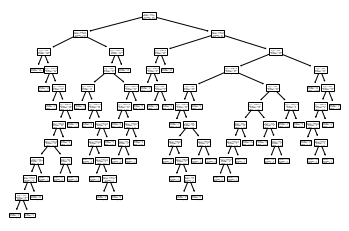

In [22]:
from sklearn.tree import plot_tree

plot_tree(model)

In [33]:
import graphviz 
from sklearn import tree

file = open("tree.png", "w")
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=x_test.columns, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.format = 'png'
graph.render('dtree_render',view=True)
# graph
file.close()

#### Evaluation

In [15]:
# predict the values
y_prediction = model.predict(x_test)
# print(y_prediction)

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[51  5]
 [ 6 18]]


In [17]:
# accuracy
from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y_test, y_prediction) * 100 :0.2f} %")

accuracy = 86.25 %


In [18]:
# classsification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        56
           1       0.78      0.75      0.77        24

    accuracy                           0.86        80
   macro avg       0.84      0.83      0.83        80
weighted avg       0.86      0.86      0.86        80



In [19]:
# RoC score
from sklearn.metrics import roc_auc_score

print(f"roc auc score = {roc_auc_score(y_test, y_prediction)}")

roc auc score = 0.8303571428571429


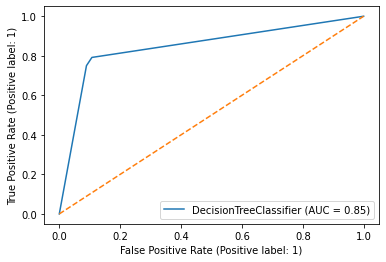

In [20]:
# AuC 
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, x_test, y_test)
plt.plot([0, 1], [0, 1], linestyle="--")